# YOLOv1

## 1. Object Detection
기존의 CNN(Convolutional Neural Network) 모델은 이미지를 분류(classification)만 하였다면 **Object Detection**은 분류(classification) + 위치추정(localization)을 수행하며 무엇이 + 어디에 있는지를 동시에 예측이 가능하다! 객체를 구별하고 그 위치를 예측하여 bounding box를 표시한다. <br>
-> bounding box: 객체 위치를 나타내는 사각형 박스([x,y,w,h])</color>


## 2. YOLO(YOU Only Look Once)
**YOLO**는 뜻 그대로 이미지를 한 번만 보고, 한 번의 신경망 연산으로 Object Detection을 수행한다! 
### YOLOv1 Detection System
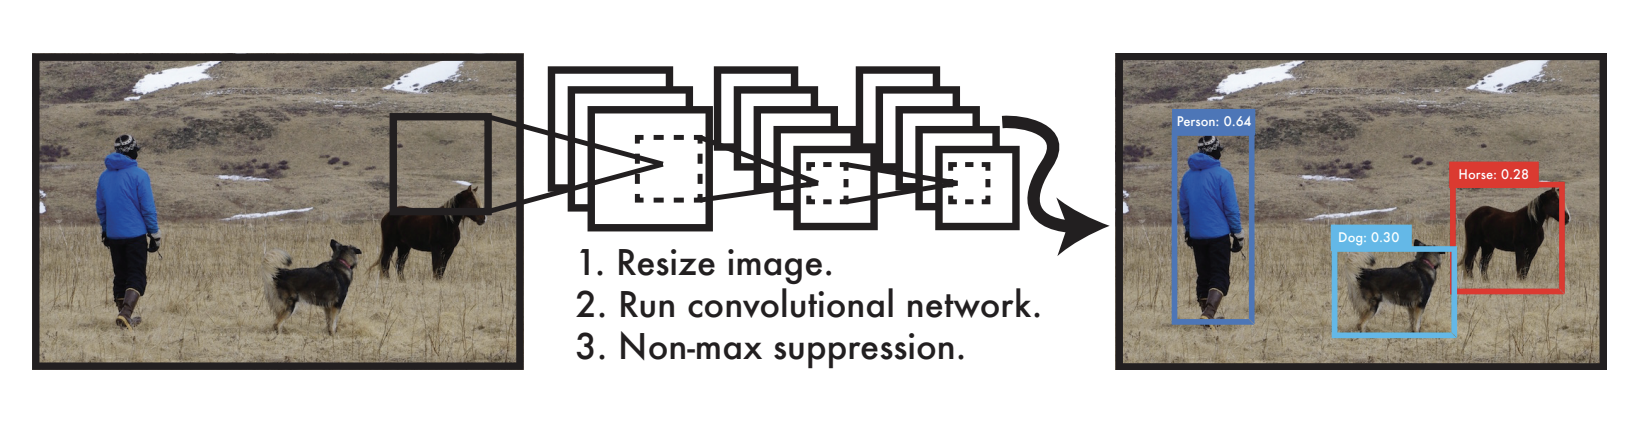
YOLO의 Detection 구조에 대해 알아보자! <br>
(1)Resize image: 원본 이미지를 448x448 크기로 조정하고, (2)Run convolutional network(합성곱 신경망): 이미지를 CNN에 한 번 통과시켜 bounding box coordinates(바운딩 박스 좌표), class probabilities(객체 클래스 확률)을 동시에 예측한다. 이미지를 SxS grid로 나누고 각 셀이 담당하는 바운딩 박스와 클래스 확률을 계산한다. (3)Non-max suppression(NMS, 비최대 억제): 예측된 bounding box 중 겹치는 박스를 제거하고 가장 높은 **Confidence score**를 가진 박스만 남긴다! <br>
* Confidence score: Pr(Object) x IOU

### YOLOv1 Model
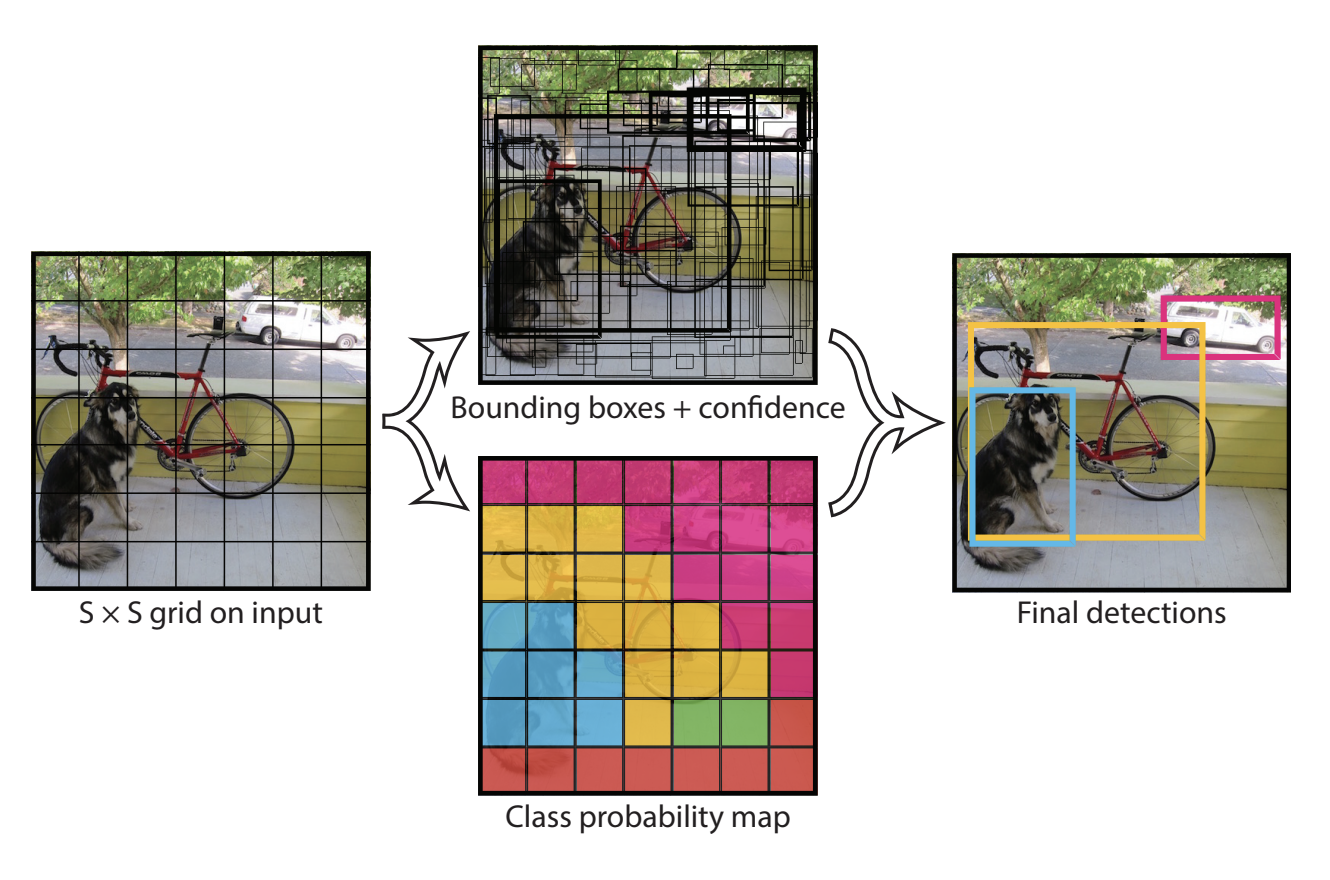
입력 이미지를 SxS 그리드로 나눈다. ex)사진에서는 7x7=49개의 셀로 나눔. 각 셀은 **B개의 Bounding box**(각각 x,y,w,h,confidence)와 **C개의 클래스 확률**(Pr(Class𝑖|Object))을 예측하고, 이 모든 예측을 하나의 SxSx(Bx5+C) tensor로 표현한다! PASCAL VOC dataset을 예시로 들면, S=7, B=2, C=20일 때 셀 하나당=2x5+20이므로 최종 예측 tensor size=7x7x30이다. <br>
최종 단계에서 각 박스의 클래스별 Confidence = Pr(Class𝑖∣Object)×Pr(Object)×IOU를 계산한다. 임계값 이하의 박스는 제거하고, NMS로 중복 박스를 없앤 뒤 최종 결과를 출력한다!

# YOLOv11

## 1. YOLO 모델의 발전
다음 표는 YOLO 모델이 처음부터 최신 버전까지의 발전 과정을 보여준다. 
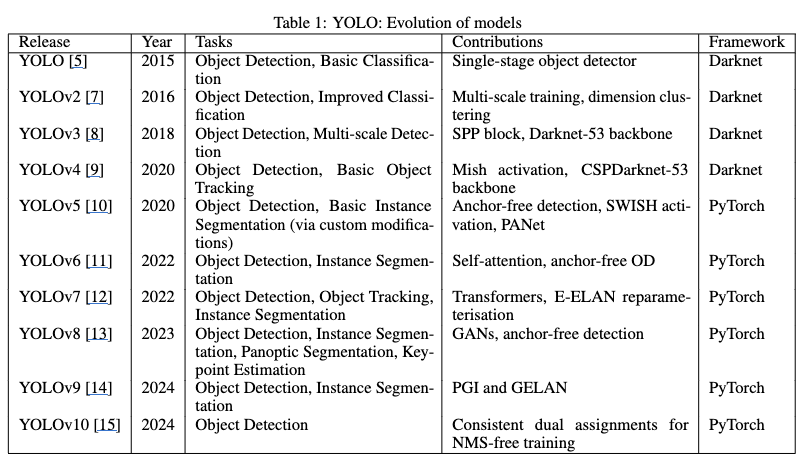

YOLOv11은 YOLOv8의 기반을 확장·개선하여 더 높은 효율성과 정확도를 달성했다.

### YOLOv11 주요 개선 사항
1. **C3k2 블록**: 기존 C2f 블록을 대체하여 더 효율적인 연산과 빠른 처리 속도를 제공. k2는 더 작은 커널 크기를 의미하며, 성능을 유지하면서 속도를 향상.
2. **C2PSA 블록**: 기존 SPPF(Spatial Pyramid Pooling – Fast) 블록을 유지하면서, 공간적 어텐션을 강화한 C2PSA(C2f + Position-Sensitive Attention) 블록을 도입. 이미지 내 중요한 영역에 집중하여 다양한 크기·위치의 객체 탐지 성능 향상.
3. **다양한 CV 작업**

---

## 2. YOLOv11 주요 아키텍처
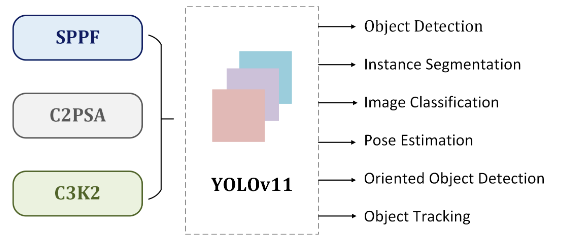
### Backbone
입력 이미지에서 다양한 스케일의 객체를 인식할 수 있도록 핵심 특징(feature)을 추출한다. <br>
CNN(합성곱 레이어)은 깊어질수록 공간 해상도는 낮아지고 채널 수는 증가하며, 각 레이어에서 생성되는 feature map은 점점 더 추상적이고 복잡한 특징을 담는다.

- **Convolutional Layers**: <br>
초기 컨볼루션 레이어에서 이미지를 다운샘플링하여 채널 수를 늘리고 공간 차원을 줄인다. <br>
YOLOv11은 C3k2 블록을 도입해 기존 C2f 블록 대비 효율성과 속도를 향상시켰다.

- **SPPF / C2PSA**: <br>
기존 SPPF 블록은 유지하면서 C2PSA 블록을 추가하여 공간적 어텐션을 강화했다. <br>
이를 통해 모델은 중요한 영역에 더 집중하고 다양한 크기·위치의 객체 탐지 성능을 높인다.

---

### Neck
다양한 크기의 feature map을 결합해 Head로 전달한다. <br>
업샘플링과 연결(concatenation)을 통해 멀티스케일 정보를 효과적으로 통합한다. 

- **C3k2 Block**: <br>
Neck에서도 C2f 블록을 C3k2 블록으로 교체해 피처 집계 속도와 효율을 높였다.

- **Attention Mechanism**: <br>
C2PSA 모듈을 통해 공간적 어텐션을 적용, 작은 객체나 가려진 객체 탐지 성능을 강화했다.

---

### Head
Neck에서 전달된 feature map을 기반으로 최종 예측을 수행한다. <br>
객체의 바운딩 박스 좌표와 클래스 레이블을 출력하여 최종 탐지 결과를 생성한다.